<a href="https://colab.research.google.com/github/KimEun-Bi/etc../blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC_3%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

따릉이 대여소 지도에 표시하기(인포그래픽)
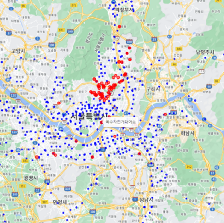

In [ ]:
# 시각화 도구 설치
!pip install plotnine
!pip install missingno
!pip install folium 

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

In [ ]:
from openpyxl import load_workbook
from google.colab import files #csv불러오는 코드는 나중에 필요할 때 검색해서 사용하시면 됩니다.
uploaded = files.upload() #공공데이터 포털에서 다운 받은 데이터파일의 이름을 바꿔줘요

In [ ]:
df = pd.read_csv("samsung_0906 (3).csv")
df


,Unnamed: 0,날짜,종가,전일비,시가,고가,저가,거래량
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2022.05.17,67600.0,1300.0,66600.0,67900.0,66600.0,15580998.0
2,2,2022.05.16,66300.0,200.0,67100.0,67400.0,66100.0,11937555.0
3,3,2022.05.13,66500.0,1600.0,65300.0,66700.0,65200.0,14551536.0
4,4,2022.05.12,64900.0,800.0,65200.0,65500.0,64900.0,16414188.0
...,...,...,...,...,...,...,...,...
9745,9745,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
9746,9746,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
9747,9747,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
9748,9748,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0


In [ ]:
# 가장 많이 대여된 자전거의 대여이력
most_bike_df = df.loc[df['자전거번호'] == bike_describe[2]]
most_bike_df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
194290,SPB-58520,2021-12-04 12:14:05,342,대학로 마로니에공원,0,2021-12-04 13:56:12,2307,압구정 한양 3차 아파트,0,102,13590.0
219718,SPB-58520,2021-12-28 15:16:32,383,신당역 12번 출구 뒤,0,2021-12-28 15:29:06,4792,퇴계로4가 교차로(중구청),0,12,1600.0
264068,SPB-58520,2021-12-04 12:02:22,457,종로꽃시장 입구 옆,0,2021-12-04 12:10:34,342,대학로 마로니에공원,0,8,1160.0
272224,SPB-58520,2021-12-28 14:49:45,474,동대문역사문화공원역 1번출구 뒤편,0,2021-12-28 15:00:16,383,신당역 12번 출구 뒤,0,10,1030.0
330375,SPB-58520,2021-12-01 11:19:00,565,옥수역 3번출구,0,2021-12-01 12:37:14,1381,석계역 4번출구 뒤,0,78,12660.0


In [ ]:
rent_station = most_bike_df['대여 대여소명'].unique()
rent_station

array(['대학로 마로니에공원', '신당역 12번 출구 뒤', '종로꽃시장 입구 옆', '동대문역사문화공원역 1번출구 뒤편',
       '옥수역 3번출구', '청계천 생태교실 앞', '신이문역 2번출구', '청솔우성아파트 앞', '서울시립대 정문 앞',
       '서울시립대 후문', '삼육서울병원 버스정류장', '꿈마루어린이도서관 앞', '광진교 남단 사거리(디지털프라자앞)',
       '해공공원(천호동)', '삼성광나루아파트 버스정류장', '암사동 선사유적지', '암사역 3번출구(국민은행앞)',
       '천호역4번출구(현대백화점)', '강동세무서', 'LIGA 아파트 앞', '강동구청역 1번 출입구',
       '샛마을 근린공원', '다성이즈빌아파트(호원대 대각선 맞은편)', '길동 사거리(초소앞)', '강동구청 앞',
       '포레스 주상복합 빌딩', '롯데 시네마', '굽은다리역', '건강보험 강동지사kt', '강일리버파크 10단지',
       '둔촌역 3번 출입구', '천동초교 삼거리', '엘웨딩', '윤선생빌딩(JYP사옥)', '풍납사거리(강동)',
       '고덕 래미안힐스테이트(201동)', '밀리아나2빌딩 앞', '거여역 3번출구', '9호선종합운동장역 9번출구',
       '잠실나루역 (2번 출구 쪽)', '롯데월드타워(잠실역2번출구 쪽)', '오금역 7번 출구 인근',
       '송파파인타운 7단지', '방이역 4번출구', '잠실4동 주민센터 옆', '거여역 8번출구 뒤',
       '잠실트리지움310동 옆', '문정 법조단지4', '문정 법조단지7', '문정 법조단지8', '송파여성문화회관 앞',
       '천호역 10번 출구 앞', '몽촌토성역 1번출구 옆', '송파구청 교차로', '송파파크데일 2단지입구 앞 주차장',
       '석촌호교차로 (스타벅스 앞)', '월계2교 버스정류장 앞', '고려대학교 2번출구',
       '장위뉴타운 꿈에 숲 코오롱 하늘채 앞', '보문역6번출구 

In [ ]:
# 대여소명 앞에 들어간 공백을 제거합니다.
bike_move = []
for s in rent_station:
    bike_move.append(s.strip())
    
bike_move  

['대학로 마로니에공원',
 '신당역 12번 출구 뒤',
 '종로꽃시장 입구 옆',
 '동대문역사문화공원역 1번출구 뒤편',
 '옥수역 3번출구',
 '청계천 생태교실 앞',
 '신이문역 2번출구',
 '청솔우성아파트 앞',
 '서울시립대 정문 앞',
 '서울시립대 후문',
 '삼육서울병원 버스정류장',
 '꿈마루어린이도서관 앞',
 '광진교 남단 사거리(디지털프라자앞)',
 '해공공원(천호동)',
 '삼성광나루아파트 버스정류장',
 '암사동 선사유적지',
 '암사역 3번출구(국민은행앞)',
 '천호역4번출구(현대백화점)',
 '강동세무서',
 'LIGA 아파트 앞',
 '강동구청역 1번 출입구',
 '샛마을 근린공원',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '길동 사거리(초소앞)',
 '강동구청 앞',
 '포레스 주상복합 빌딩',
 '롯데 시네마',
 '굽은다리역',
 '건강보험 강동지사kt',
 '강일리버파크 10단지',
 '둔촌역 3번 출입구',
 '천동초교 삼거리',
 '엘웨딩',
 '윤선생빌딩(JYP사옥)',
 '풍납사거리(강동)',
 '고덕 래미안힐스테이트(201동)',
 '밀리아나2빌딩 앞',
 '거여역 3번출구',
 '9호선종합운동장역 9번출구',
 '잠실나루역 (2번 출구 쪽)',
 '롯데월드타워(잠실역2번출구 쪽)',
 '오금역 7번 출구 인근',
 '송파파인타운 7단지',
 '방이역 4번출구',
 '잠실4동 주민센터 옆',
 '거여역 8번출구 뒤',
 '잠실트리지움310동 옆',
 '문정 법조단지4',
 '문정 법조단지7',
 '문정 법조단지8',
 '송파여성문화회관 앞',
 '천호역 10번 출구 앞',
 '몽촌토성역 1번출구 옆',
 '송파구청 교차로',
 '송파파크데일 2단지입구 앞 주차장',
 '석촌호교차로 (스타벅스 앞)',
 '월계2교 버스정류장 앞',
 '고려대학교 2번출구',
 '장위뉴타운 꿈에 숲 코오롱 하늘채 앞',
 '보문역6번출구 앞',
 '석계역 4번출구 뒤',
 '성북청소년센터',
 '금란주차장 앞',
 '

In [ ]:
bike_move_df = pd.DataFrame(bike_move)
bike_move_df.columns = ['대여소']
print(bike_move_df.shape)
bike_move_df.head()

(163, 1)


,대여소
0,대학로 마로니에공원
1,신당역 12번 출구 뒤
2,종로꽃시장 입구 옆
3,동대문역사문화공원역 1번출구 뒤편
4,옥수역 3번출구


In [ ]:
stations = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/opengovlab/bike_rent_station.csv')
stations ###공공데이터 API 인증키 발급이 필요

HTTPError: ignored

In [ ]:
bike_move_df = pd.DataFrame(bike_move)
bike_move_df.columns = ['대여소']
print(bike_move_df.shape)
bike_move_df.head()

(163, 1)


,대여소
0,대학로 마로니에공원
1,신당역 12번 출구 뒤
2,종로꽃시장 입구 옆
3,동대문역사문화공원역 1번출구 뒤편
4,옥수역 3번출구


In [ ]:
bike_move_df = bike_move_df.merge(stations, left_on='대여소', right_on='대여 대여소명', how='left')
bike_move_df.shape

(168924, 12)

In [ ]:
bike_move_df.head()

,대여소,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,대학로 마로니에공원,SPB-35711,2021-12-01 00:00:30,342,대학로 마로니에공원,0,2021-12-01 00:13:16,380,CJ제일제당 앞,0,12,1884.17
1,대학로 마로니에공원,SPB-44491,2021-12-01 00:53:54,342,대학로 마로니에공원,0,2021-12-01 00:57:46,344,성균관대 E하우스 앞,0,3,811.88
2,대학로 마로니에공원,SPB-46802,2021-12-01 01:18:00,342,대학로 마로니에공원,0,2021-12-01 01:23:04,345,서울보증보험본사 앞,0,5,810.00
3,대학로 마로니에공원,SPB-39532,2021-12-01 03:10:44,342,대학로 마로니에공원,0,2021-12-01 03:14:51,345,서울보증보험본사 앞,0,4,697.86
4,대학로 마로니에공원,SPB-40332,2021-12-01 05:55:07,342,대학로 마로니에공원,0,2021-12-01 05:57:47,356,KT혜화지사 앞,0,2,222.39


In [ ]:
bike_move_df.isnull().sum()

대여소         0
자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

In [ ]:
# 정보가 없는 대여소
#bike_move_df.loc[bike_move_df['경도'].isnull()]

KeyError: ignored

In [ ]:
#한글을 쓸경우 오류가 떠요 그러면 폰트 설정을 해주셔야합니다 한글로 폰트를 바꾸는 방법은 구글에서 필요할때 긁어오면 돼요

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [ ]:
plt.figure(figsize=(3,3))
plt.plot([0,1], [0,0], label='한글 설정 중..')
plt.legend()
plt.show()

In [ ]:
# 지도 표현을 위해 folium 을 import 합니다.
# 데이터 프레임에서 위도와 경도의 평균값을 구합니다. 이 값으로 지도의 중심이 될 좌표를 정합니다.
# zoom_start는 지도를 얼마나 확대해서 볼것인지 입니다.
# tiles는 지도의 스타일 입니다.
import folium 

geo_df = bike_move_df
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    if geo_df['위도'][n] > 0 and geo_df['경도'][n] > 0 :
        loc_name = geo_df['대여소'][n]

        icon_color = 'red'
        folium.Circle(
            location=[geo_df['위도'][n], geo_df['경도'][n]],
            popup=loc_name,
            radius=50,
            color=icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)
    
map

KeyError: ignored

BeautifulSoup 라이브러리

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
#뉴스 제목<title> 가져오기
## 사이트 둘러보기 : https://news.v.daum.net/v/20210827000104709

res = requests.get("https://news.v.daum.net/v/20210827000104709")
print(res.content)

b'<!doctype html>\n<html lang="ko"> \n <head data-cloud-area="head"> \n  <meta charset="utf-8"> \n  <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n  <style>\n            @import url(\'//t1.daumcdn.net/harmony_static/cloud/page/ad23f0c9e6dfe91eebd21c5a9bf5fb189c454f1c1648095650663.css\');\n            @import url(\'//t1.daumcdn.net/harmony_static/cloud/2022/04/25/common.6fd08eed44c294a26fba.css\')\n        </style> \n  <style>\n            /* \xeb\x8b\xa4\xec\x9d\x8c \xec\xb9\xb4\xed\x8e\x98 \xec\x86\x8c\xec\x85\x9c \xec\x89\x90\xec\x96\xb4 \xec\x9e\x84\xec\x8b\x9c \xeb\xb9\x84\xed\x99\x9c\xec\x84\xb1\xed\x99\x94 */\n            .list_sns li:nth-child(6) {\n                display: none;\n            }\n        </style> \n  <meta property="mccp:docId" content="kp1IhVwvYO"> \n  <meta property="og:site_name" content="\xeb\x8b\xa4\xec\x9d\x8c\xeb\x89\xb4\xec\x8a\xa4"> \n  <meta property="og:title" content="\xec\xa7\x80\xea\xb5\xac\xec\x98\xa8\xeb\x82\x9c\xed\x99\x94 \xeb\x95\x8c\x

In [ ]:
soup = BeautifulSoup(res.content, 'html.parser') #데이터문자열(html, json 등)에서 원하는 데이터를 분석하여 추출해줘!

In [ ]:
title = soup.find('title')

In [ ]:
print(title.get_text())

지구온난화 때문에 엘니뇨·라니냐까지 사라진다


In [ ]:
#뉴스 내용 가져오기<body>

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
res = requests.get("https://news.v.daum.net/v/20210827000104709")
print(res.content)

b'<!doctype html>\n<html lang="ko"> \n <head data-cloud-area="head"> \n  <meta charset="utf-8"> \n  <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n  <style>\n            @import url(\'//t1.daumcdn.net/harmony_static/cloud/page/ad23f0c9e6dfe91eebd21c5a9bf5fb189c454f1c1648095650663.css\');\n            @import url(\'//t1.daumcdn.net/harmony_static/cloud/2022/04/25/common.6fd08eed44c294a26fba.css\')\n        </style> \n  <style>\n            /* \xeb\x8b\xa4\xec\x9d\x8c \xec\xb9\xb4\xed\x8e\x98 \xec\x86\x8c\xec\x85\x9c \xec\x89\x90\xec\x96\xb4 \xec\x9e\x84\xec\x8b\x9c \xeb\xb9\x84\xed\x99\x9c\xec\x84\xb1\xed\x99\x94 */\n            .list_sns li:nth-child(6) {\n                display: none;\n            }\n        </style> \n  <meta property="mccp:docId" content="kp1IhVwvYO"> \n  <meta property="og:site_name" content="\xeb\x8b\xa4\xec\x9d\x8c\xeb\x89\xb4\xec\x8a\xa4"> \n  <meta property="og:title" content="\xec\xa7\x80\xea\xb5\xac\xec\x98\xa8\xeb\x82\x9c\xed\x99\x94 \xeb\x95\x8c\x

In [ ]:
soup = BeautifulSoup(res.content, 'html.parser') #데이터문자열(html, json 등)에서 원하는 데이터를 분석하여 추출해줘!

In [ ]:
soup.find_all('p')

[<p>이달 초 기후변화에 관한 정부간 협의체(IPCC)는 기후변화의 마지노선으로 정한 산업화 이전 대비 지구평균 온도 1.5도를 넘는 시기가 이전 예측보다 12년이나 빨라졌다는 보고서를 발표했다.</p>,
 <p>기초과학연구원(IBS) 기후물리연구단, 독일 막스플랑크 기상연구소, 미국 하와이대 공동연구팀은 지금과 같은 지구온난화가 계속 이어질 경우 엘니뇨, 라니냐 현상이 사라질 가능성이 높다는 연구결과를 환경과학 분야 국제학술지 '네이처 기후변화' 27일자에 발표했다.</p>,
 <p class="desc_translate txt_newsview">Translated by <a class="link_kakaoi #util #translate #kakaoi_link" href="https://kakao.ai/" target="_blank">kakao i</a></p>,
 <p class="txt_status notice_lang notice_lang_en" style="display:none;">The copyright belongs to the original writer of the content, and there may be errors in machine translation results.</p>,
 <p class="txt_status notice_lang notice_lang_cn" style="display:none;">版权归内容原作者所有。机器翻译结果可能存在错误。</p>,
 <p class="txt_status notice_lang notice_lang_jp" style="display:none;">原文の著作権は原著著作者にあり、機械翻訳の結果にエラーが含まれることがあります。</p>,
 <p class="txt_status notice_lang notice_lang_id" style="display:none;">Hak cipta milik penulis asli dari konten, dan mungkin ditemukan kesalahan dala

In [ ]:
print(soup.find('p').getText())

이달 초 기후변화에 관한 정부간 협의체(IPCC)는 기후변화의 마지노선으로 정한 산업화 이전 대비 지구평균 온도 1.5도를 넘는 시기가 이전 예측보다 12년이나 빨라졌다는 보고서를 발표했다.


#프로젝트 1 주식데이터 크롤링
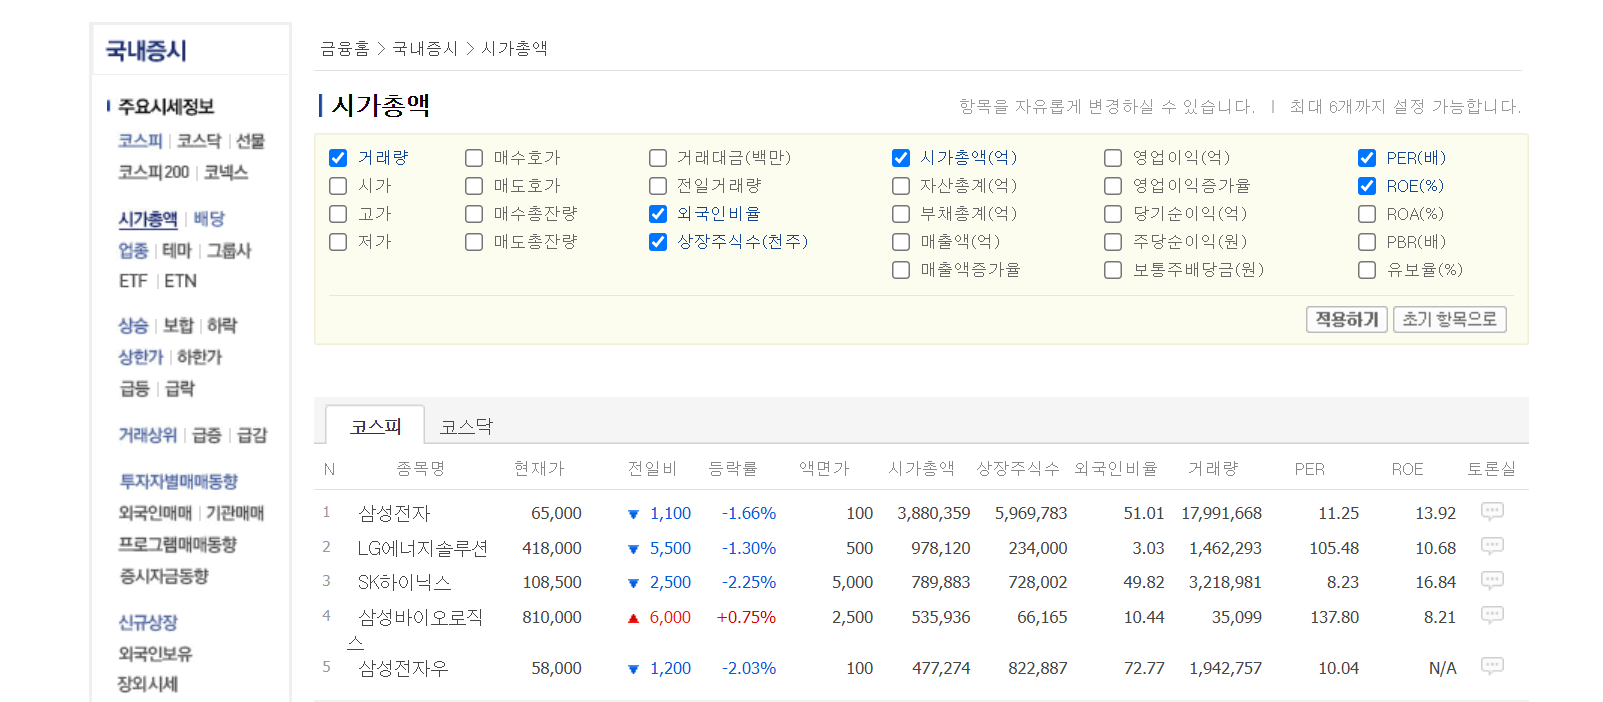

In [ ]:
import urllib.request
from bs4 import BeautifulSoup as bs

In [ ]:
#정보를 가져올 웹 사이트 주소
##웹사이트 둘러보기 https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page=1

stock_url = "https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page=1" 

In [ ]:
#웹 페이지 정보 가져오기
response = urllib.request.urlopen(stock_url)
stock_html = response.read()

In [ ]:
soup = bs(stock_html)

In [ ]:
#가져온 데이터 확인하기
soup

<!--  global include --><html lang="ko">
<head>
<title>시가총액 : 네이버 금융</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="http://finance.naver.com/sise/sise_market_sum.nhn" property="og:url"/>
<meta content="시가총액 : 네이버 금융" property="og:title"/>
<meta content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳" property="og:description"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버금융" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220511192542/css/finance_header.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/2

In [ ]:
#원하는 정보를 포함한 태그 정보 가져오기
all_tr = soup.findAll('tr')
all_tr

[<tr>
 <td class="choice"><input checked="" id="option1" name="fieldIds" type="checkbox" value="quant"/> <label for="option1">거래량</label></td>
 <td><input id="option2" name="fieldIds" type="checkbox" value="ask_buy"/> <label for="option2">매수호가</label></td>
 <td><input id="option3" name="fieldIds" type="checkbox" value="amount"/> <label for="option3">거래대금</label>(백만)</td>
 <td class="choice"><input checked="" id="option4" name="fieldIds" type="checkbox" value="market_sum"/> <label for="option4">시가총액</label>(억)</td>
 <td><input id="option5" name="fieldIds" type="checkbox" value="operating_profit"/> <label for="option5">영업이익</label>(억)</td>
 <td class="choice"><input checked="" id="option6" name="fieldIds" type="checkbox" value="per"/> <label for="option6">PER</label>(배)</td>
 </tr>, <tr>
 <td><input id="option7" name="fieldIds" type="checkbox" value="open_val"/> <label for="option7">시가</label></td>
 <td><input id="option8" name="fieldIds" type="checkbox" value="ask_sell"/> <label for="op

In [ ]:
#Test
all_tr[7].findAll('a', attrs={'class', 'tltle'})[0]

<a class="tltle" href="/item/main.naver?code=005930">삼성전자</a>

In [ ]:
# 종목명을 넣어줄 비어있는 리스트 만들기
stock_name_list = []

#가져온 정보 리스트에 넣어주기
for tr in soup.findAll('tr'):
    stock_name = tr.findAll('a', attrs={'class', 'tltle'})
    if stock_name is None or stock_name == []:
        pass
    else:
        print(stock_name[0].contents[-1])
        stock_name_list.append(stock_name[0].contents[-1])

삼성전자
LG에너지솔루션
SK하이닉스
삼성바이오로직스
삼성전자우
NAVER
삼성SDI
현대차
카카오
LG화학
기아
POSCO홀딩스
KB금융
삼성물산
신한지주
셀트리온
SK이노베이션
카카오뱅크
현대모비스
SK
LG전자
한국전력
HMM
하나금융지주
삼성생명
SK텔레콤
두산에너빌리티
S-Oil
삼성전기
LG
크래프톤
카카오페이
KT&G
우리금융지주
삼성에스디에스
현대중공업
LG생활건강
고려아연
대한항공
포스코케미칼
SK바이오사이언스
KT
삼성화재
엔씨소프트
아모레퍼시픽
하이브
SK아이이테크놀로지
기업은행
LG이노텍
현대글로비스


In [ ]:
#가져온 데이터 확인
stock_name_list

['삼성전자',
 'LG에너지솔루션',
 'SK하이닉스',
 '삼성바이오로직스',
 '삼성전자우',
 'NAVER',
 '삼성SDI',
 '현대차',
 '카카오',
 'LG화학',
 '기아',
 'POSCO홀딩스',
 'KB금융',
 '삼성물산',
 '신한지주',
 '셀트리온',
 'SK이노베이션',
 '카카오뱅크',
 '현대모비스',
 'SK',
 'LG전자',
 '한국전력',
 'HMM',
 '하나금융지주',
 '삼성생명',
 'SK텔레콤',
 '두산에너빌리티',
 'S-Oil',
 '삼성전기',
 'LG',
 '크래프톤',
 '카카오페이',
 'KT&G',
 '우리금융지주',
 '삼성에스디에스',
 '현대중공업',
 'LG생활건강',
 '고려아연',
 '대한항공',
 '포스코케미칼',
 'SK바이오사이언스',
 'KT',
 '삼성화재',
 '엔씨소프트',
 '아모레퍼시픽',
 '하이브',
 'SK아이이테크놀로지',
 '기업은행',
 'LG이노텍',
 '현대글로비스']

In [ ]:
# 현재가 정보 가져오기 
stock_price_list = []

#가져온 정보 리스트에 넣어주기
for tr in soup.findAll('tr'):
    stock_price = tr.findAll('td', attrs={'class', 'number'})
    if stock_price is None or stock_price == []:
        pass
    else:
        print(stock_price[0].contents[-1])
        stock_price_list.append(stock_price[0].contents[-1])

67,600
408,500
112,500
766,000
59,900
275,500
591,000
185,500
83,200
505,000
85,200
287,500
58,000
117,500
42,400
142,500
208,000
40,000
199,500
250,000
107,500
22,750
29,350
46,250
67,200
60,500
20,550
113,000
161,500
75,300
240,000
88,700
83,900
15,700
145,000
121,500
684,000
552,000
28,900
124,000
125,000
36,550
200,000
421,500
157,000
219,000
117,500
11,250
343,000
208,000


In [ ]:
#가져온 데이터 확인
stock_price_list

['67,600',
 '408,500',
 '112,500',
 '766,000',
 '59,900',
 '275,500',
 '591,000',
 '185,500',
 '83,200',
 '505,000',
 '85,200',
 '287,500',
 '58,000',
 '117,500',
 '42,400',
 '142,500',
 '208,000',
 '40,000',
 '199,500',
 '250,000',
 '107,500',
 '22,750',
 '29,350',
 '46,250',
 '67,200',
 '60,500',
 '20,550',
 '113,000',
 '161,500',
 '75,300',
 '240,000',
 '88,700',
 '83,900',
 '15,700',
 '145,000',
 '121,500',
 '684,000',
 '552,000',
 '28,900',
 '124,000',
 '125,000',
 '36,550',
 '200,000',
 '421,500',
 '157,000',
 '219,000',
 '117,500',
 '11,250',
 '343,000',
 '208,000']

In [ ]:
#가격 데이터 타입 확인
type(stock_price_list[1])

bs4.element.NavigableString

In [ ]:
#가격 데이터에서 ',' 지우기
stock_price_list[1].replace(",","")

'408500'

In [ ]:
#가격 데이터 타입 int로 변경하기
type(int(stock_price_list[1].replace(",","")))

int

In [ ]:
#종목명+현재가 리스트 합치기
stock_list = []

for i in range(len(stock_name_list)):
    stock = [stock_name_list[i], int(stock_price_list[i].replace(",",""))]
    stock_list.append(stock)

stock_list

[['삼성전자', 67600],
 ['LG에너지솔루션', 408500],
 ['SK하이닉스', 112500],
 ['삼성바이오로직스', 766000],
 ['삼성전자우', 59900],
 ['NAVER', 275500],
 ['삼성SDI', 591000],
 ['현대차', 185500],
 ['카카오', 83200],
 ['LG화학', 505000],
 ['기아', 85200],
 ['POSCO홀딩스', 287500],
 ['KB금융', 58000],
 ['삼성물산', 117500],
 ['신한지주', 42400],
 ['셀트리온', 142500],
 ['SK이노베이션', 208000],
 ['카카오뱅크', 40000],
 ['현대모비스', 199500],
 ['SK', 250000],
 ['LG전자', 107500],
 ['한국전력', 22750],
 ['HMM', 29350],
 ['하나금융지주', 46250],
 ['삼성생명', 67200],
 ['SK텔레콤', 60500],
 ['두산에너빌리티', 20550],
 ['S-Oil', 113000],
 ['삼성전기', 161500],
 ['LG', 75300],
 ['크래프톤', 240000],
 ['카카오페이', 88700],
 ['KT&G', 83900],
 ['우리금융지주', 15700],
 ['삼성에스디에스', 145000],
 ['현대중공업', 121500],
 ['LG생활건강', 684000],
 ['고려아연', 552000],
 ['대한항공', 28900],
 ['포스코케미칼', 124000],
 ['SK바이오사이언스', 125000],
 ['KT', 36550],
 ['삼성화재', 200000],
 ['엔씨소프트', 421500],
 ['아모레퍼시픽', 157000],
 ['하이브', 219000],
 ['SK아이이테크놀로지', 117500],
 ['기업은행', 11250],
 ['LG이노텍', 343000],
 ['현대글로비스', 208000]]

특정 주식 종목 일별 시세 크롤링

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
#삼성전자 일별 시세 크롤링
url = 'https://finance.naver.com/item/sise_day.nhn?code=005930' #개발자도구에서 일별시세 근처 URL 복사해왔어요
##참고로 6. http://finance.naver.com/item/sise_day.nhn?code=****** 에서 ****** 부분을 종목 코드로 바꿔주면 어떤 종목이든 일별주가 데이터에 접근할 수 있어요

In [ ]:
headers = {'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36'} #헤더는 통신할때 약속한 값이예요

In [ ]:
req = requests.get(url, headers = headers)

In [ ]:
# 첫번째 페이지 파싱, 전체 페이지 수 카운드
soup = BeautifulSoup(req.text, 'html.parser')


In [ ]:
last_page = int(soup.select_one('td.pgRR').a['href'].split('=')[-1])

In [ ]:
print(last_page)

650


In [ ]:
# 모든 페이지 df에 담기 -> 엑셀로 저장할꺼예요
df = None
for page in range(1, last_page + 1):
  req = requests.get(f'{url}&page={page}', headers = headers)
  df = pd.concat([df, pd.read_html(req.text, encoding = 'euc-kr')[0]], ignore_index = True)

In [ ]:
df.head()

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.05.17,67600.0,1300.0,66600.0,67900.0,66600.0,15580998.0
2,2022.05.16,66300.0,200.0,67100.0,67400.0,66100.0,11937555.0
3,2022.05.13,66500.0,1600.0,65300.0,66700.0,65200.0,14551536.0
4,2022.05.12,64900.0,800.0,65200.0,65500.0,64900.0,16414188.0


In [ ]:
# CSV로 받기
!mkdir -p '/content/drive/My Drive/stocklist_data'
df.to_csv("/content/drive/My Drive/stocklist_data/samsung_0906.csv")



NameError: ignored

In [ ]:
from google.colab import files
files.download("/content/drive/My Drive/stocklist_data/samsung_0906.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#df 정보 파악하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9750 entries, 0 to 9749
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      6500 non-null   object 
 1   종가      6500 non-null   float64
 2   전일비     6500 non-null   float64
 3   시가      6500 non-null   float64
 4   고가      6500 non-null   float64
 5   저가      6500 non-null   float64
 6   거래량     6500 non-null   float64
dtypes: float64(6), object(1)
memory usage: 533.3+ KB


In [ ]:
#df 데이터 앞 10개 데이터 확인하기
df.head(10)

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.05.17,67600.0,1300.0,66600.0,67900.0,66600.0,15580998.0
2,2022.05.16,66300.0,200.0,67100.0,67400.0,66100.0,11937555.0
3,2022.05.13,66500.0,1600.0,65300.0,66700.0,65200.0,14551536.0
4,2022.05.12,64900.0,800.0,65200.0,65500.0,64900.0,16414188.0
5,2022.05.11,65700.0,0.0,65500.0,66300.0,65200.0,12330920.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022.05.10,65700.0,400.0,65900.0,66300.0,65300.0,17235605.0


In [ ]:
df=pd.read_csv("/content/drive/My Drive/stocklist_data/samsung_0906.csv",)

NameError: ignored

In [ ]:
#df 데이터 뒤 10개 데이터 확인하기
df.tail()

,Unnamed: 0,날짜,종가,전일비,시가,고가,저가,거래량
9745,9745,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
9746,9746,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
9747,9747,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
9748,9748,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0
9749,9749,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna() #결측치행 버리기
df

,Unnamed: 0,날짜,종가,전일비,시가,고가,저가,거래량
1,1,2022.05.17,67600.0,1300.0,66600.0,67900.0,66600.0,15580998.0
2,2,2022.05.16,66300.0,200.0,67100.0,67400.0,66100.0,11937555.0
3,3,2022.05.13,66500.0,1600.0,65300.0,66700.0,65200.0,14551536.0
4,4,2022.05.12,64900.0,800.0,65200.0,65500.0,64900.0,16414188.0
5,5,2022.05.11,65700.0,0.0,65500.0,66300.0,65200.0,12330920.0
...,...,...,...,...,...,...,...,...
9744,9744,1996.07.01,72000.0,3500.0,69000.0,72300.0,68800.0,147310.0
9745,9745,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
9746,9746,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
9747,9747,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0


In [ ]:
#df의 통계 정보 확인하기
df.describe()

,Unnamed: 0,종가,전일비,시가,고가,저가,거래량
count,6500.00000,6.500000e+03,6500.000000,6.500000e+03,6.500000e+03,6.500000e+03,6.500000e+03
mean,4874.50000,6.370781e+05,9174.753846,6.358466e+05,6.429265e+05,6.286987e+05,2.857972e+06
std,2814.79896,6.118771e+05,12465.777045,6.105637e+05,6.160940e+05,6.048320e+05,6.575625e+06
min,1.00000,3.330000e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2438.00000,8.200000e+04,1000.000000,8.197500e+04,8.290000e+04,8.110000e+04,2.592538e+05
50%,4874.50000,4.960000e+05,5000.000000,4.950000e+05,5.000000e+05,4.900000e+05,4.439295e+05
75%,7311.00000,9.455000e+05,12000.000000,9.435000e+05,9.530000e+05,9.350000e+05,8.575772e+05
max,9748.00000,2.861000e+06,141000.000000,2.875000e+06,2.876000e+06,2.838000e+06,9.030618e+07


In [ ]:
df = df[:40] #임의로 데이터를 잘라줄께요

In [ ]:
#한글을 쓸경우 오류가 떠요 그러면 폰트 설정을 해주셔야합니다 한글로 폰트를 바꾸는 방법은 구글에서 필요할때 긁어오면 돼요

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


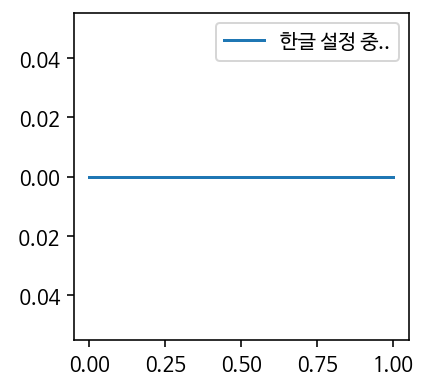

In [ ]:
plt.figure(figsize=(3,3))
plt.plot([0,1], [0,0], label='한글 설정 중..')
plt.legend()
plt.show()

In [ ]:
df

,Unnamed: 0,날짜,종가,전일비,시가,고가,저가,거래량
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2022.05.17,67600.0,1300.0,66600.0,67900.0,66600.0,15580998.0
2,2,2022.05.16,66300.0,200.0,67100.0,67400.0,66100.0,11937555.0
3,3,2022.05.13,66500.0,1600.0,65300.0,66700.0,65200.0,14551536.0
4,4,2022.05.12,64900.0,800.0,65200.0,65500.0,64900.0,16414188.0
...,...,...,...,...,...,...,...,...
9745,9745,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
9746,9746,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
9747,9747,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
9748,9748,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0


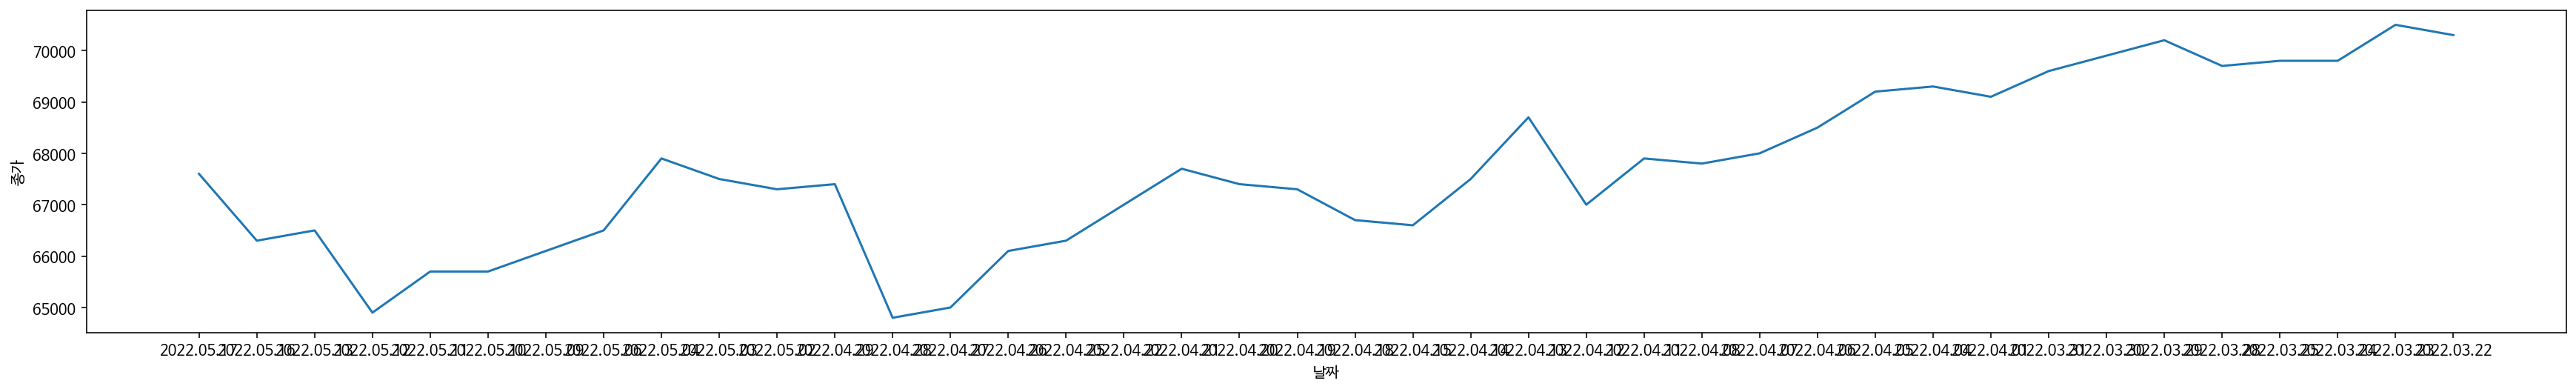

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import table 
import os

plt.figure(figsize=(30,4))
plt.plot(df['날짜'], df['종가'])
plt.xlabel('날짜')
plt.ylabel('종가')

# chart_fname = os.path.join("res/stock_report" ,'{company}_chart.png'.format(company=company))
plt.savefig('삼성전자_chart.png')
plt.show()



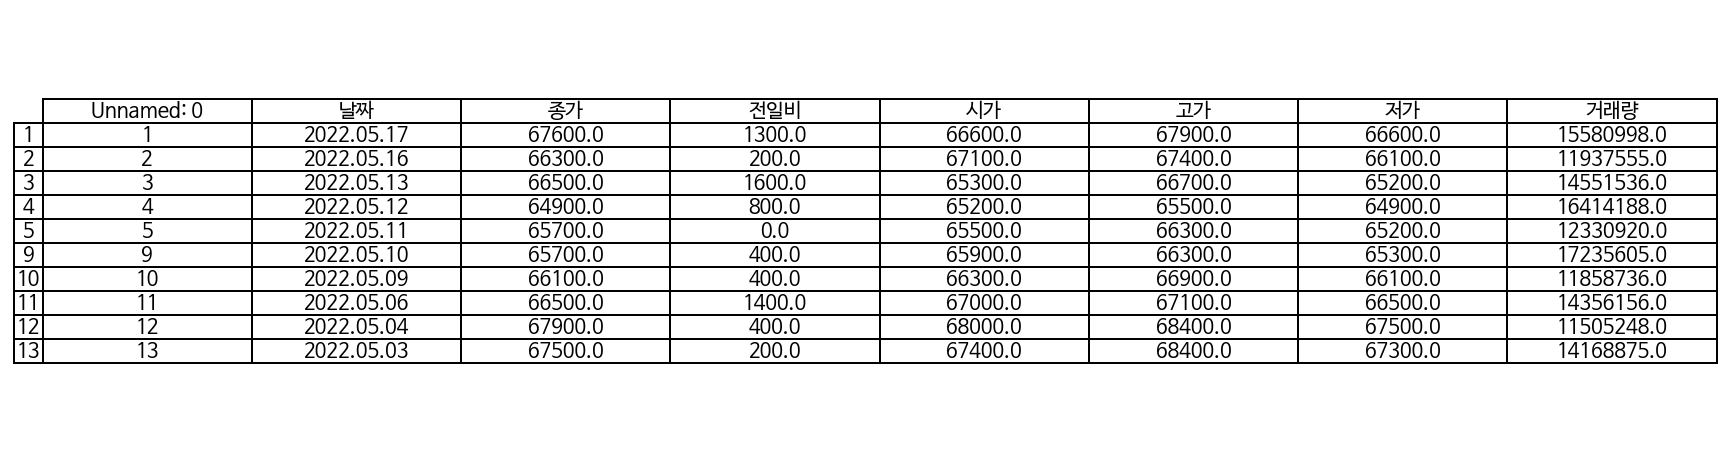

In [ ]:
plt.figure(figsize=(15,4))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
df = df.sort_values(by=['날짜'], ascending=False) 
table(ax, df.head(10), loc='center', cellLoc = 'center', rowLoc = 'center')  # where df is your data frame

# table_fname = os.path.join("res/stock_report" ,'{company}_table.png'.format(company=company))
plt.savefig('삼성전자_table.png')

In [ ]:
#파이썬이 ppt에 보고서를 그려줄거예요
!pip install python-pptx

     |████████████████████████████████| 10.1 MB 5.3 MB/s 
     |████████████████████████████████| 149 kB 49.2 MB/s 
  Created wheel for python-pptx: filename=python_pptx-0.6.21-py3-none-any.whl size=470951 sha256=04ae0fb00620e4803ad656644d563db1fab761c838adf5f3f72436fb8b53ea65
  Stored in directory: /root/.cache/pip/wheels/a7/ab/f4/52560d0d4bd4055e9261c6df6e51c7b56c2b23cca3dee811a3
Successfully built python-pptx


In [ ]:
import datetime #날짜와 관련된 라이브러리
from pptx import Presentation 
from pptx.util import Inches 
import os

In [ ]:
today = datetime.datetime.today().strftime('%Y%m%d')
print(today) #컴퓨터가 알아볼수잇도록 날짜를 바꿔줄께요

20220517


In [ ]:
#ppt에 넣을 그래프들 설정
company = '삼성전자'
chart_fname = '삼성전자_chart.png'
table_fname = '삼성전자_table.png'

In [ ]:
# ppt 객체 선언
오늘 = datetime.datetime.today().strftime('%Y%m%d')
prs = Presentation() 
 
# 제목 장표 추가
title_slide_layout = prs.slide_layouts[0] 
slide = prs.slides.add_slide(title_slide_layout) 
 
# 제목
title = slide.shapes.title  # 제목
title.text = "일일 주식 보고서" 

# 부제목
subtitle = slide.placeholders[1] 
subtitle.text = "작성일 : {일자}".format(일자=오늘) 

title_only_slide_layout = prs.slide_layouts[5] 
slide = prs.slides.add_slide(title_only_slide_layout)

shapes = slide.shapes
shapes.title.text = '{company} {close}원에 거래 마감'.format(company=company,close=df.iloc[0]['종가'])
print(shapes.title.text)

# 차트 추가
left = Inches(0.5)
height = Inches(2.5)
width = Inches(9)
top = Inches(2)

pic = slide.shapes.add_picture(chart_fname, left, top, width=width, height=height)
 
# 테이블 추가
left = Inches(-1)
height = Inches(3)
width = Inches(12)
top = Inches(4)
 
pic = slide.shapes.add_picture(table_fname, left, top, width=width, height=height)
cursor_sp = slide.shapes[0]._element 
cursor_sp.addprevious(pic._element) 

prs.save('stock_report.pptx') #왼쪽폴더에서 확인할 수 있어요

삼성전자 67600.0원에 거래 마감


#프로젝트2. 코로나데이터 가져오기

In [ ]:
#필요한 라이브러리 가져오기
import pandas as pd

In [ ]:
#가져올 정보가 있는 웹 사이트 url 저장하기
##백신접종현황 가져오기
url_v = 'https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000'

In [ ]:
#pandas 함수를 사용해서 바로 웹 사이트의 정보 가져온 정보 table 객체에 저장하기
table=pd.read_html(url_v, encoding='utf-8')

In [ ]:
#table에 저장된 데이터 확인
table

[           구분      1차접종      2차접종      3차접종     4차접종
 0  당일 누적A + B  45044887  44563802  33233246  3522370
 1      당일 실적A       543       739      6663    54927
 2      전일 누적B  45044344  44563063  33226583  3467443,
     구분  1차접종            2차접종            3차접종             4차접종         
     구분 당일 실적     당일 누계 당일 실적     당일 누계 당일 실적     당일 누계  당일 실적    당일 누계
 0   합계   543  45044887   739  44563802  6663  33233246  54927  3522370
 1   서울   127   8333032   154   8246798  1283   5987439   9400   567245
 2   부산    36   2877383    53   2846400   430   2113076   3929   235375
 3   대구    18   2017927    15   1993755   269   1390142   1621   119193
 4   인천    26   2565410    54   2538325   389   1887315   3212   179980
 5   광주    14   1261631    26   1248398   234    959173   1395   111584
 6   대전    15   1244986    27   1231577   222    898920   1149    96673
 7   울산     4    967811    16    957543   152    713288    831    54186
 8   세종     0    297475     7    293277    62    206392    271 

In [ ]:
#table 타입 확인
type(table)

list

In [ ]:
#table 리스트의 길이 확인
len(table)

2

In [ ]:
#table의 첫번째 데이터 확인
table[0]

,구분,1차접종,2차접종,3차접종,4차접종
0,당일 누적A + B,45044887,44563802,33233246,3522370
1,당일 실적A,543,739,6663,54927
2,전일 누적B,45044344,44563063,33226583,3467443


In [ ]:
type(table[0])

pandas.core.frame.DataFrame

In [ ]:
#table의 두번째 데이터 확인
table[1]

구분  1차접종            2차접종            3차접종             4차접종         
    구분 당일 실적     당일 누계 당일 실적     당일 누계 당일 실적     당일 누계  당일 실적    당일 누계
0   합계   543  45044887   739  44563802  6663  33233246  54927  3522370
1   서울   127   8333032   154   8246798  1283   5987439   9400   567245
2   부산    36   2877383    53   2846400   430   2113076   3929   235375
3   대구    18   2017927    15   1993755   269   1390142   1621   119193
4   인천    26   2565410    54   2538325   389   1887315   3212   179980
5   광주    14   1261631    26   1248398   234    959173   1395   111584
6   대전    15   1244986    27   1231577   222    898920   1149    96673
7   울산     4    967811    16    957543   152    713288    831    54186
8   세종     0    297475     7    293277    62    206392    271    16879
9   경기   153  11806849   162  11679399  1600   8584697  12117   764347
10  강원     8   1347832    25   1335153   172   1052342   2190   134776
11  충북    15   1426328    23   1412061   236   1094414   1844   144460
12  충남    21   1895745    38   1875620   295   1461108   2612   188131
13  전북    23   1591242    30   1575686   248   1272623   2691   209196
14  전남    13   1651488    29   1634075   257   1349776   3494   245917
15  경북    28   2290297    34   2264646   304   1708511   2956   187391
16  경남    31   2879899    32   2848181   430   2121213   4675   223951
17  제주    11    589552    14    582908    80    432817    540    43086